<a href="https://colab.research.google.com/github/ritesh537/ml-project/blob/master/Red_Wine_Quality_Regression_Hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Wine Quality Hypothesis

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('winequality-red.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Data Visualization

In [ ]:
#finding correlations
correlations = dataset.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


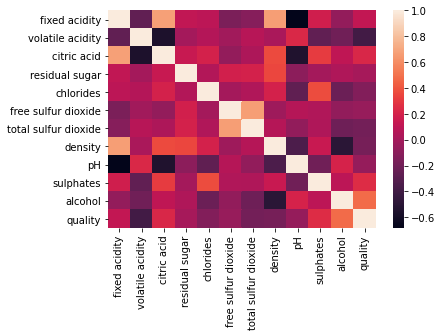

In [ ]:
import seaborn as sns
sns.heatmap(dataset.corr())
plt.show()

# Data Cleaning

In [ ]:
# dropping "residual sugar" feature as coorelation value is very low 0.01
dataset = dataset.drop(['residual sugar'], axis=1)
dataset.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)


# Training the Multiple Linear Regression model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

 Predicting the Test set results

In [ ]:
y_pred = regressor.predict(sc_X.fit_transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5.76 6.  ]
 [4.98 5.  ]
 [6.64 7.  ]
 [5.27 6.  ]
 [5.93 5.  ]
 [4.96 6.  ]
 [5.35 5.  ]
 [6.06 6.  ]
 [4.77 4.  ]
 [4.89 5.  ]
 [5.25 5.  ]
 [5.37 5.  ]
 [5.68 6.  ]
 [5.02 5.  ]
 [5.51 6.  ]
 [6.42 6.  ]
 [6.83 7.  ]
 [5.71 5.  ]
 [5.92 5.  ]
 [5.06 4.  ]
 [6.31 7.  ]
 [5.13 6.  ]
 [5.61 6.  ]
 [6.17 4.  ]
 [5.48 6.  ]
 [4.94 5.  ]
 [5.13 5.  ]
 [6.51 7.  ]
 [5.3  5.  ]
 [6.28 6.  ]
 [6.05 5.  ]
 [5.82 6.  ]
 [5.54 5.  ]
 [5.26 6.  ]
 [5.68 7.  ]
 [6.18 7.  ]
 [5.13 5.  ]
 [5.53 6.  ]
 [6.39 6.  ]
 [5.76 7.  ]
 [5.4  5.  ]
 [6.06 7.  ]
 [6.69 6.  ]
 [6.63 6.  ]
 [5.96 5.  ]
 [4.69 5.  ]
 [5.46 6.  ]
 [6.02 6.  ]
 [5.46 6.  ]
 [6.11 5.  ]
 [5.3  5.  ]
 [5.27 5.  ]
 [5.79 6.  ]
 [6.35 6.  ]
 [5.73 6.  ]
 [5.2  5.  ]
 [5.03 5.  ]
 [5.27 5.  ]
 [6.53 6.  ]
 [5.44 5.  ]
 [5.15 5.  ]
 [5.75 6.  ]
 [6.05 6.  ]
 [6.26 6.  ]
 [5.03 5.  ]
 [6.12 6.  ]
 [5.31 5.  ]
 [6.   5.  ]
 [6.13 6.  ]
 [5.96 6.  ]
 [5.29 6.  ]
 [5.48 6.  ]
 [4.99 4.  ]
 [5.56 6.  ]
 [5.6  5.  ]
 [6.23 6.  ]
 [5.38 5.  ]

 Evaluating the Model Performance

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3250370497220223

In [ ]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE Score:',1-metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.38638992329389704
RMSE Score: 0.613610076706103


# Traing Randomforest model on the Training set

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
#predicting the Test set results
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[6.3 6. ]
 [6.  5. ]
 [6.3 7. ]
 [6.3 6. ]
 [6.2 5. ]
 [6.3 6. ]
 [6.3 5. ]
 [6.2 6. ]
 [6.3 4. ]
 [6.3 5. ]
 [6.2 5. ]
 [6.3 5. ]
 [6.  6. ]
 [6.3 5. ]
 [6.3 6. ]
 [6.3 6. ]
 [6.3 7. ]
 [6.3 5. ]
 [6.3 5. ]
 [6.  4. ]
 [6.3 7. ]
 [6.3 6. ]
 [6.3 6. ]
 [6.  4. ]
 [6.3 6. ]
 [6.3 5. ]
 [6.3 5. ]
 [6.3 7. ]
 [6.3 5. ]
 [6.2 6. ]
 [6.3 5. ]
 [6.3 6. ]
 [6.2 5. ]
 [6.3 6. ]
 [6.3 7. ]
 [6.3 7. ]
 [6.3 5. ]
 [6.3 6. ]
 [6.3 6. ]
 [6.3 7. ]
 [6.3 5. ]
 [6.  7. ]
 [6.  6. ]
 [6.3 6. ]
 [6.3 5. ]
 [6.  5. ]
 [6.2 6. ]
 [6.3 6. ]
 [6.3 6. ]
 [6.3 5. ]
 [6.3 5. ]
 [6.3 5. ]
 [6.  6. ]
 [6.  6. ]
 [6.3 6. ]
 [6.3 5. ]
 [6.3 5. ]
 [6.3 5. ]
 [6.3 6. ]
 [6.3 5. ]
 [6.3 5. ]
 [6.3 6. ]
 [6.2 6. ]
 [6.  6. ]
 [6.3 5. ]
 [6.3 6. ]
 [6.3 5. ]
 [6.  5. ]
 [6.  6. ]
 [6.  6. ]
 [6.3 6. ]
 [6.3 6. ]
 [6.3 4. ]
 [6.3 6. ]
 [6.3 5. ]
 [6.3 6. ]
 [6.3 5. ]
 [6.3 5. ]
 [6.  5. ]
 [6.3 6. ]
 [6.3 6. ]
 [6.3 5. ]
 [6.3 6. ]
 [6.2 6. ]
 [6.3 6. ]
 [6.  5. ]
 [6.  6. ]
 [6.3 5. ]
 [6.2 5. ]
 [6.3 5. ]
 [6.3 5. ]

Evaluating the Model Performance

In [ ]:
print(r2_score(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE Score:',1-metrics.mean_squared_error(y_test, y_pred))

0.34797351338762705
Mean Squared Error: 0.3732596938009502
RMSE Score: 0.6267403061990497


# Training the SVR model on the Training set

Feature scaling including dependent varaiable

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
y = y.reshape(len(y),1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

Training the SVR model on the Training set

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

predicting the Test set results

In [ ]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[5.28 6.  ]
 [5.23 5.  ]
 [7.06 7.  ]
 [4.88 6.  ]
 [6.03 5.  ]
 [5.17 6.  ]
 [5.1  5.  ]
 [5.92 6.  ]
 [5.09 4.  ]
 [5.05 5.  ]
 [5.   5.  ]
 [5.46 5.  ]
 [5.61 6.  ]
 [5.49 5.  ]
 [5.45 6.  ]
 [6.42 6.  ]
 [6.92 7.  ]
 [5.4  5.  ]
 [5.52 5.  ]
 [5.29 4.  ]
 [6.06 7.  ]
 [5.26 6.  ]
 [5.72 6.  ]
 [5.79 4.  ]
 [5.4  6.  ]
 [5.11 5.  ]
 [5.19 5.  ]
 [6.86 7.  ]
 [4.98 5.  ]
 [6.07 6.  ]
 [5.89 5.  ]
 [5.92 6.  ]
 [5.69 5.  ]
 [5.43 6.  ]
 [6.09 7.  ]
 [5.98 7.  ]
 [5.28 5.  ]
 [5.72 6.  ]
 [6.17 6.  ]
 [5.92 7.  ]
 [5.2  5.  ]
 [6.67 7.  ]
 [6.4  6.  ]
 [6.5  6.  ]
 [5.94 5.  ]
 [5.01 5.  ]
 [5.1  6.  ]
 [5.8  6.  ]
 [5.07 6.  ]
 [5.96 5.  ]
 [4.84 5.  ]
 [5.15 5.  ]
 [6.01 6.  ]
 [6.08 6.  ]
 [5.45 6.  ]
 [5.24 5.  ]
 [4.91 5.  ]
 [5.16 5.  ]
 [6.74 6.  ]
 [5.68 5.  ]
 [5.02 5.  ]
 [5.9  6.  ]
 [6.09 6.  ]
 [5.82 6.  ]
 [5.13 5.  ]
 [6.14 6.  ]
 [5.17 5.  ]
 [5.07 5.  ]
 [6.32 6.  ]
 [6.07 6.  ]
 [5.29 6.  ]
 [5.24 6.  ]
 [5.06 4.  ]
 [5.26 6.  ]
 [5.63 5.  ]
 [6.05 6.  ]
 [5.29 5.  ]

Evaluating the Model Performane

In [ ]:
print(r2_score(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE Score:',1-metrics.mean_squared_error(y_test, y_pred))

0.34797351338762705
Mean Squared Error: 0.3732596938009502
RMSE Score: 0.6267403061990497
